In [4]:
import sys
sys.path.append('/home/kevinteng/Desktop/Masterarbeit')
import numpy as np
from batchgenerators.dataloading import MultiThreadedAugmenter, SingleThreadedAugmenter
import wandb
import utils
import utils_vis
import pandas as pd
import matplotlib.pyplot as plt
from batchgenerators.dataloading.data_loader import DataLoader
import random
from batchgenerators.augmentations.crop_and_pad_augmentations import crop

# Random Crop

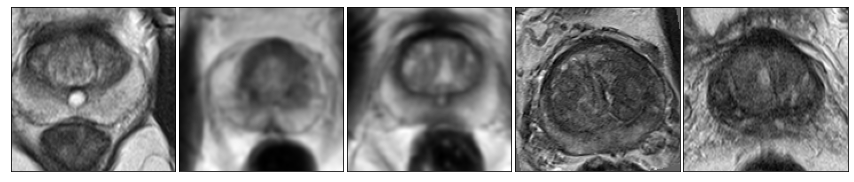

[2 1 2 1 1 1 0 0 1 2 1 0 0 2 0 2 0 2]
(18, 24, 144, 144, 3)


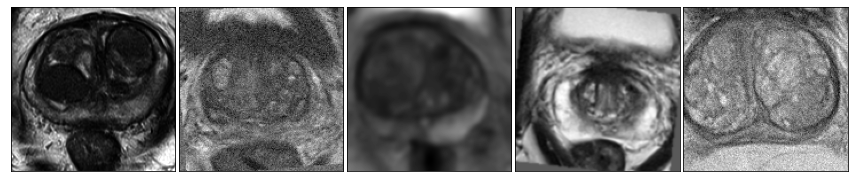

[0 2 0 1 1 1 0 1 0 2 2 2 0 2 0 2 1 1]
(18, 24, 144, 144, 3)


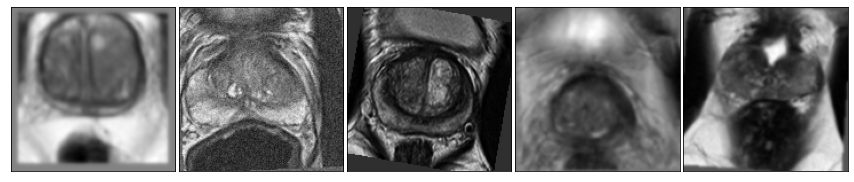

[1 1 0 0 2 2 0 2 1 0 0 1 0 1 2 1 2 2]
(18, 24, 144, 144, 3)


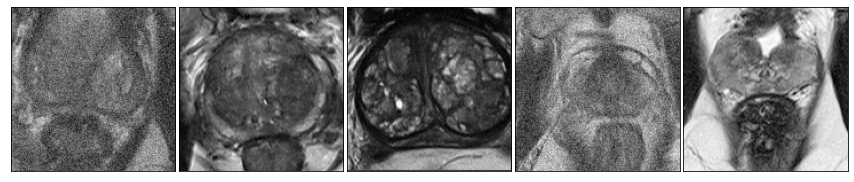

[1 1 1 2 2 2 2 2 1 0 0 2 0 0 0 1 0 1]
(18, 24, 144, 144, 3)


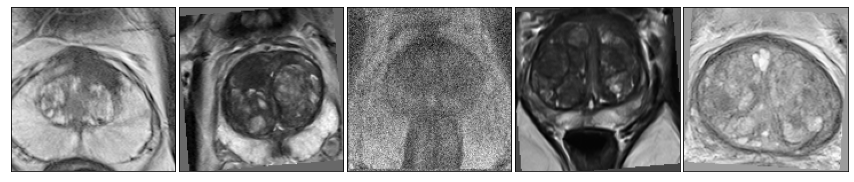

[0 1 2 1 1 2 0 2 1 0 0 1 2 2 0 2 0 1]
(18, 24, 144, 144, 3)


In [ ]:
# hyperparam
sample_per_class = 6
patch_size = (144, 144, 24)
# original image size (256, 256, 24)
# crop inside the shape of (166, 166, 24)
crop_margins = (45,45,0)
n_class = 3
batch_size = n_class*sample_per_class


tabular_data = pd.read_csv('/home/kevinteng/Desktop/csv_npy/three_classes_npy.csv')
ds_dict = utils.get_split_fold(tabular_data)
train_dl = utils.BalancedDataLoader3D(data=ds_dict['train_ds'], sample_size=30, sample_per_class=sample_per_class, 
                                patch_size=patch_size, num_threads_in_multithreaded=1, 
                                crop_type='random', margins=crop_margins,seed_for_shuffle=5243)
tr_transforms = utils.get_train_transform(patch_size=patch_size)
tr_gen = SingleThreadedAugmenter(train_dl, tr_transforms)

# train_total_batch = int(round(len(ds_dict['train_ds']['labels'])/batch_size))
for i in range(10):
    batch = next(tr_gen)
    img = np.swapaxes(batch["data"], 1,-1)
    img_list = [img[i, 12,...,0] for i in range(5)]
    utils_vis.grid_plot_nn(img_list, nrows=1, ncols=5, figsize=(15, 15))
    print(batch['lbl'])
    print(img.shape)

# Center Crop

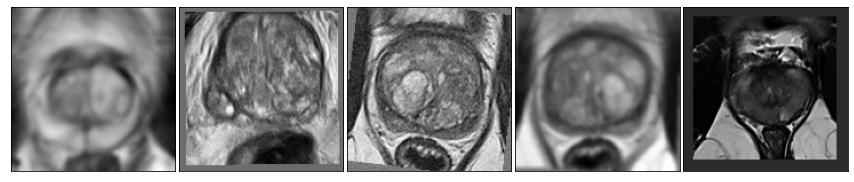

[1 1 1 1 2 0 0 2 1 0 0 2 2 2 0 0 1 2]
(18, 24, 144, 144, 3)


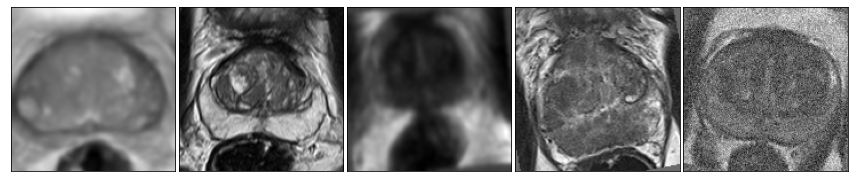

[0 1 2 0 2 1 2 2 1 0 1 0 1 2 0 1 0 2]
(18, 24, 144, 144, 3)


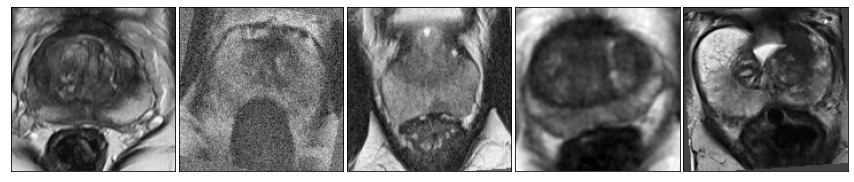

[0 0 2 0 0 2 1 2 1 1 1 0 2 2 1 2 0 1]
(18, 24, 144, 144, 3)


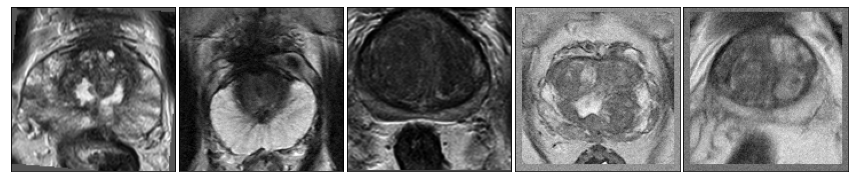

[0 1 1 0 2 0 2 2 1 1 2 0 1 1 0 2 2 0]
(18, 24, 144, 144, 3)


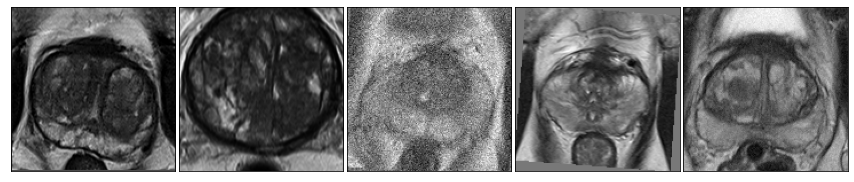

[0 1 1 2 2 1 0 1 0 2 1 2 2 1 0 2 0 0]
(18, 24, 144, 144, 3)


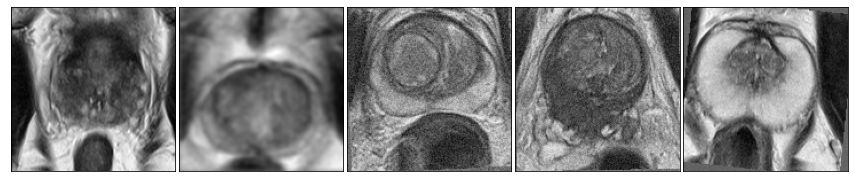

[0 0 1 0 1 0 2 0 0 1 2 2 1 2 2 2 1 1]
(18, 24, 144, 144, 3)


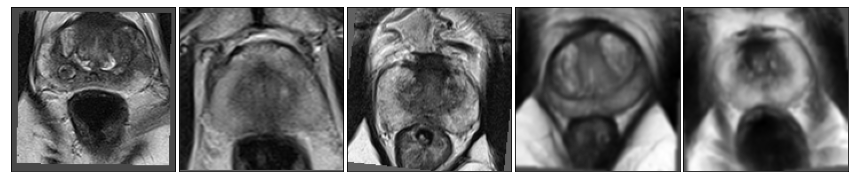

[2 1 2 2 0 1 0 1 0 1 0 1 2 0 2 2 0 1]
(18, 24, 144, 144, 3)


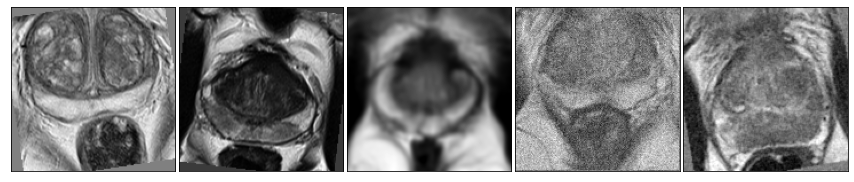

[1 0 2 1 0 1 2 2 1 1 0 0 0 2 1 2 0 2]
(18, 24, 144, 144, 3)


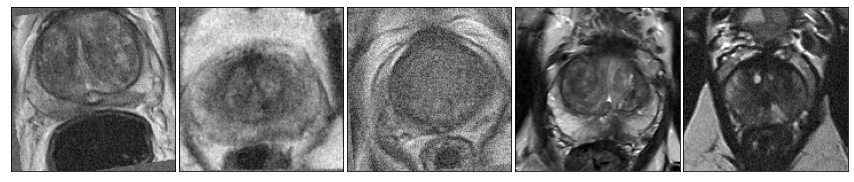

[2 0 1 0 2 0 0 2 1 1 0 2 2 2 0 1 1 1]
(18, 24, 144, 144, 3)


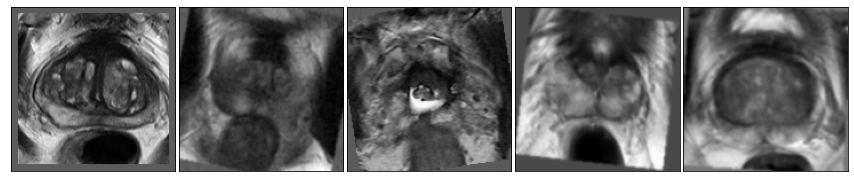

[2 0 0 2 0 2 0 2 1 1 2 1 0 1 2 1 1 0]
(18, 24, 144, 144, 3)


In [5]:
center_train_dl = utils.BalancedDataLoader3D(data=ds_dict['train_ds'], sample_size=30, sample_per_class=sample_per_class, 
                                patch_size=patch_size, num_threads_in_multithreaded=1, 
                                crop_type='center', seed_for_shuffle=5243)
tr_transforms = utils.get_train_transform(patch_size=patch_size)
center_tr_gen = SingleThreadedAugmenter(center_train_dl, tr_transforms)

# train_total_batch = int(round(len(ds_dict['train_ds']['labels'])/batch_size))
for i in range(10):
    batch = next(center_tr_gen)
    img = np.swapaxes(batch["data"], 1,-1)
    img_list = [img[i, 12,...,0] for i in range(5)]
    utils_vis.grid_plot_nn(img_list, nrows=1, ncols=5, figsize=(15, 15))
    print(batch['lbl'])
    print(img.shape)